<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/IA_y_ML_Actividad_Semana_3_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1419]:
# test

# **Maestría en Analítica de Negocios**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

### **Actividad Semanas 3 y 4: Modelado, Balanceo e Importancia de Factores**
### Integrantes:
### Carlos López - A00947174
### Leonardo Leal - A01451635
### Miguel Sánchez Rivas - A00736968
### Ruben Angeles - A01745487
### Alejandro Salgado - A00376244


La rotación de personal es uno de los problemas que afecta actualmente a muchas empresas y organizaciones, grandes o pequeñas. En esta actividad usaremos una base de datos generada por IBM para estudiar cómo enfrentar dicho problema.
Deberás descargar el archivo de la siguiente liga de Kaggle, la cual consta de 1470 registros y 35 columnas:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


### **PARTE 1: Análisis descriptivo y preprocesamiento de los datos:**


#### **1) Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem) y en particular de las principales problemáticas que genera.**

El problema de rotación de personal, o employee attrition problem, se refiere a la frecuencia con la que los empleados abandonan sus puestos en una organización. Esto genera varios desafíos:
1. Costos financieros: Contratar y capacitar nuevos empleados es costoso.
2. Disminución de la productividad: La búsqueda y adaptación de nuevos empleados puede reducir la productividad del equipo.
3. Impacto en la moral y el compromiso: La rotación constante puede desmotivar al personal y afectar la cultura de la empresa.
4. Pérdida de conocimiento y experiencia: Cada partida implica la pérdida de habilidades y conocimientos.
5. Dificultades en la retención de talento: La alta rotación dificulta retener a los empleados más talentosos y valiosos.
Por lo que gestionar la rotación de personal es esencial para el éxito a largo plazo de una organización.




#### **2) Carga la base de datos y realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”.**


In [1420]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # para un mejor despliegue de los gráficos
sns.set_theme(color_codes=True)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


In [1421]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1422]:
# Cargamos la base de datos:
df = pd.read_csv("/content/drive/MyDrive/Actividad Semana 3 - HR-Employee-Attrition.csv")
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [1423]:
#In case you can´t connect to google drive file directly, you can use the local path, change if need.
#local_path = '/content/sample_data/Actividad Semana 3 - HR-Employee-Attrition.csv'

In [1424]:
# Cargamos la base de datos local:
#df = pd.read_csv(local_path)
#df.head(3)

Antes que nada busquemos columnas con renglones vacíos

In [1425]:
# Calcular la cantidad de valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar para mostrar solo aquellos que son diferentes de cero
null_counts_nonzero = null_counts[null_counts != 0]

# Mostrar los resultados
print("Cantidad de valores nulos por columna que son diferentes de cero:")
print(null_counts_nonzero)

Cantidad de valores nulos por columna que son diferentes de cero:
Series([], dtype: int64)


Y entendamos el tipo de dato para cada columna

In [1426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1427]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Ahora separemos nuestra variable predictora de nuestra base de datos.

In [1428]:
# Como vemos que nuestra variable predictora es Attrition, por lo que necesitamos moverla al final de la base de datos'

# Extraer la columna 'Attrition' (variable objetivo)
attrition_column = df.pop('Attrition')

# Insertar la columna 'Attrition' al final del DataFrame
df['Attrition'] = attrition_column
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [1429]:
# Separamos los factores de entrada y la variable de salida:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

**a) Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [1430]:
# Dividir los datos en entrenamiento (70%) y temporal (30%) -- Nota: Temporal incluye Validación y Prueba
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.3, random_state= None)

# Dividir el temporal en validación (50%) y prueba (50%)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state= None)

print("Entrenamiento X:", Xtrain.shape,    '%.1f%%' % (100 * Xtrain.shape[0]  / (Xtrain.shape[0] + Xval.shape[0] + Xtest.shape[0] )))
print("Validación    X:", Xval.shape,      '%.1f%%' % (100 * Xval.shape[0]    / (Xtrain.shape[0] + Xval.shape[0] + Xtest.shape[0] )))
print("Prueba        X:", Xtest.shape,     '%.1f%%' % (100 * Xtest.shape[0]   / (Xtrain.shape[0] + Xval.shape[0] + Xtest.shape[0] )))

print("Entrenamiento y:", ytrain.shape,    '%.1f%%' % (100 * ytrain.shape[0]  / (ytrain.shape[0] + yval.shape[0] + ytest.shape[0] )))
print("Validación    y:", yval.shape,      '%.1f%%' % (100 * yval.shape[0]    / (ytrain.shape[0] + yval.shape[0] + ytest.shape[0] )))
print("Prueba        y:", ytest.shape,     '%.1f%%' % (100 * ytest.shape[0]   / (ytrain.shape[0] + yval.shape[0] + ytest.shape[0] )))

Entrenamiento X: (1029, 34) 70.0%
Validación    X: (220, 34) 15.0%
Prueba        X: (221, 34) 15.0%
Entrenamiento y: (1029,) 70.0%
Validación    y: (220,) 15.0%
Prueba        y: (221,) 15.0%


**b) Realiza un análisis inicial de todas las variables y elimina aquellas que no estarán aportando información al problema. Indica cuáles y el porqué de las variables que estás eliminando.**

####Análisis exploratorio variables numéricas

En nuestro analisis inicial, realizaremos pruebas de valores únicos y correlaciones para nuestros datos numéricos y así identificar todas aquellas probables variablesno estarían proporcionando información adicional significativa sobre las renuncias (Attrition) = Atrición

In [1431]:
#Seleccionar variables númericas
num_vars = df[["Age", "DailyRate", "DistanceFromHome", "Education", "EmployeeCount", "EmployeeNumber", "EnvironmentSatisfaction",
                           "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
                           "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel",
                           "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
                           "YearsSinceLastPromotion", "YearsWithCurrManager"]]
num_vars.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


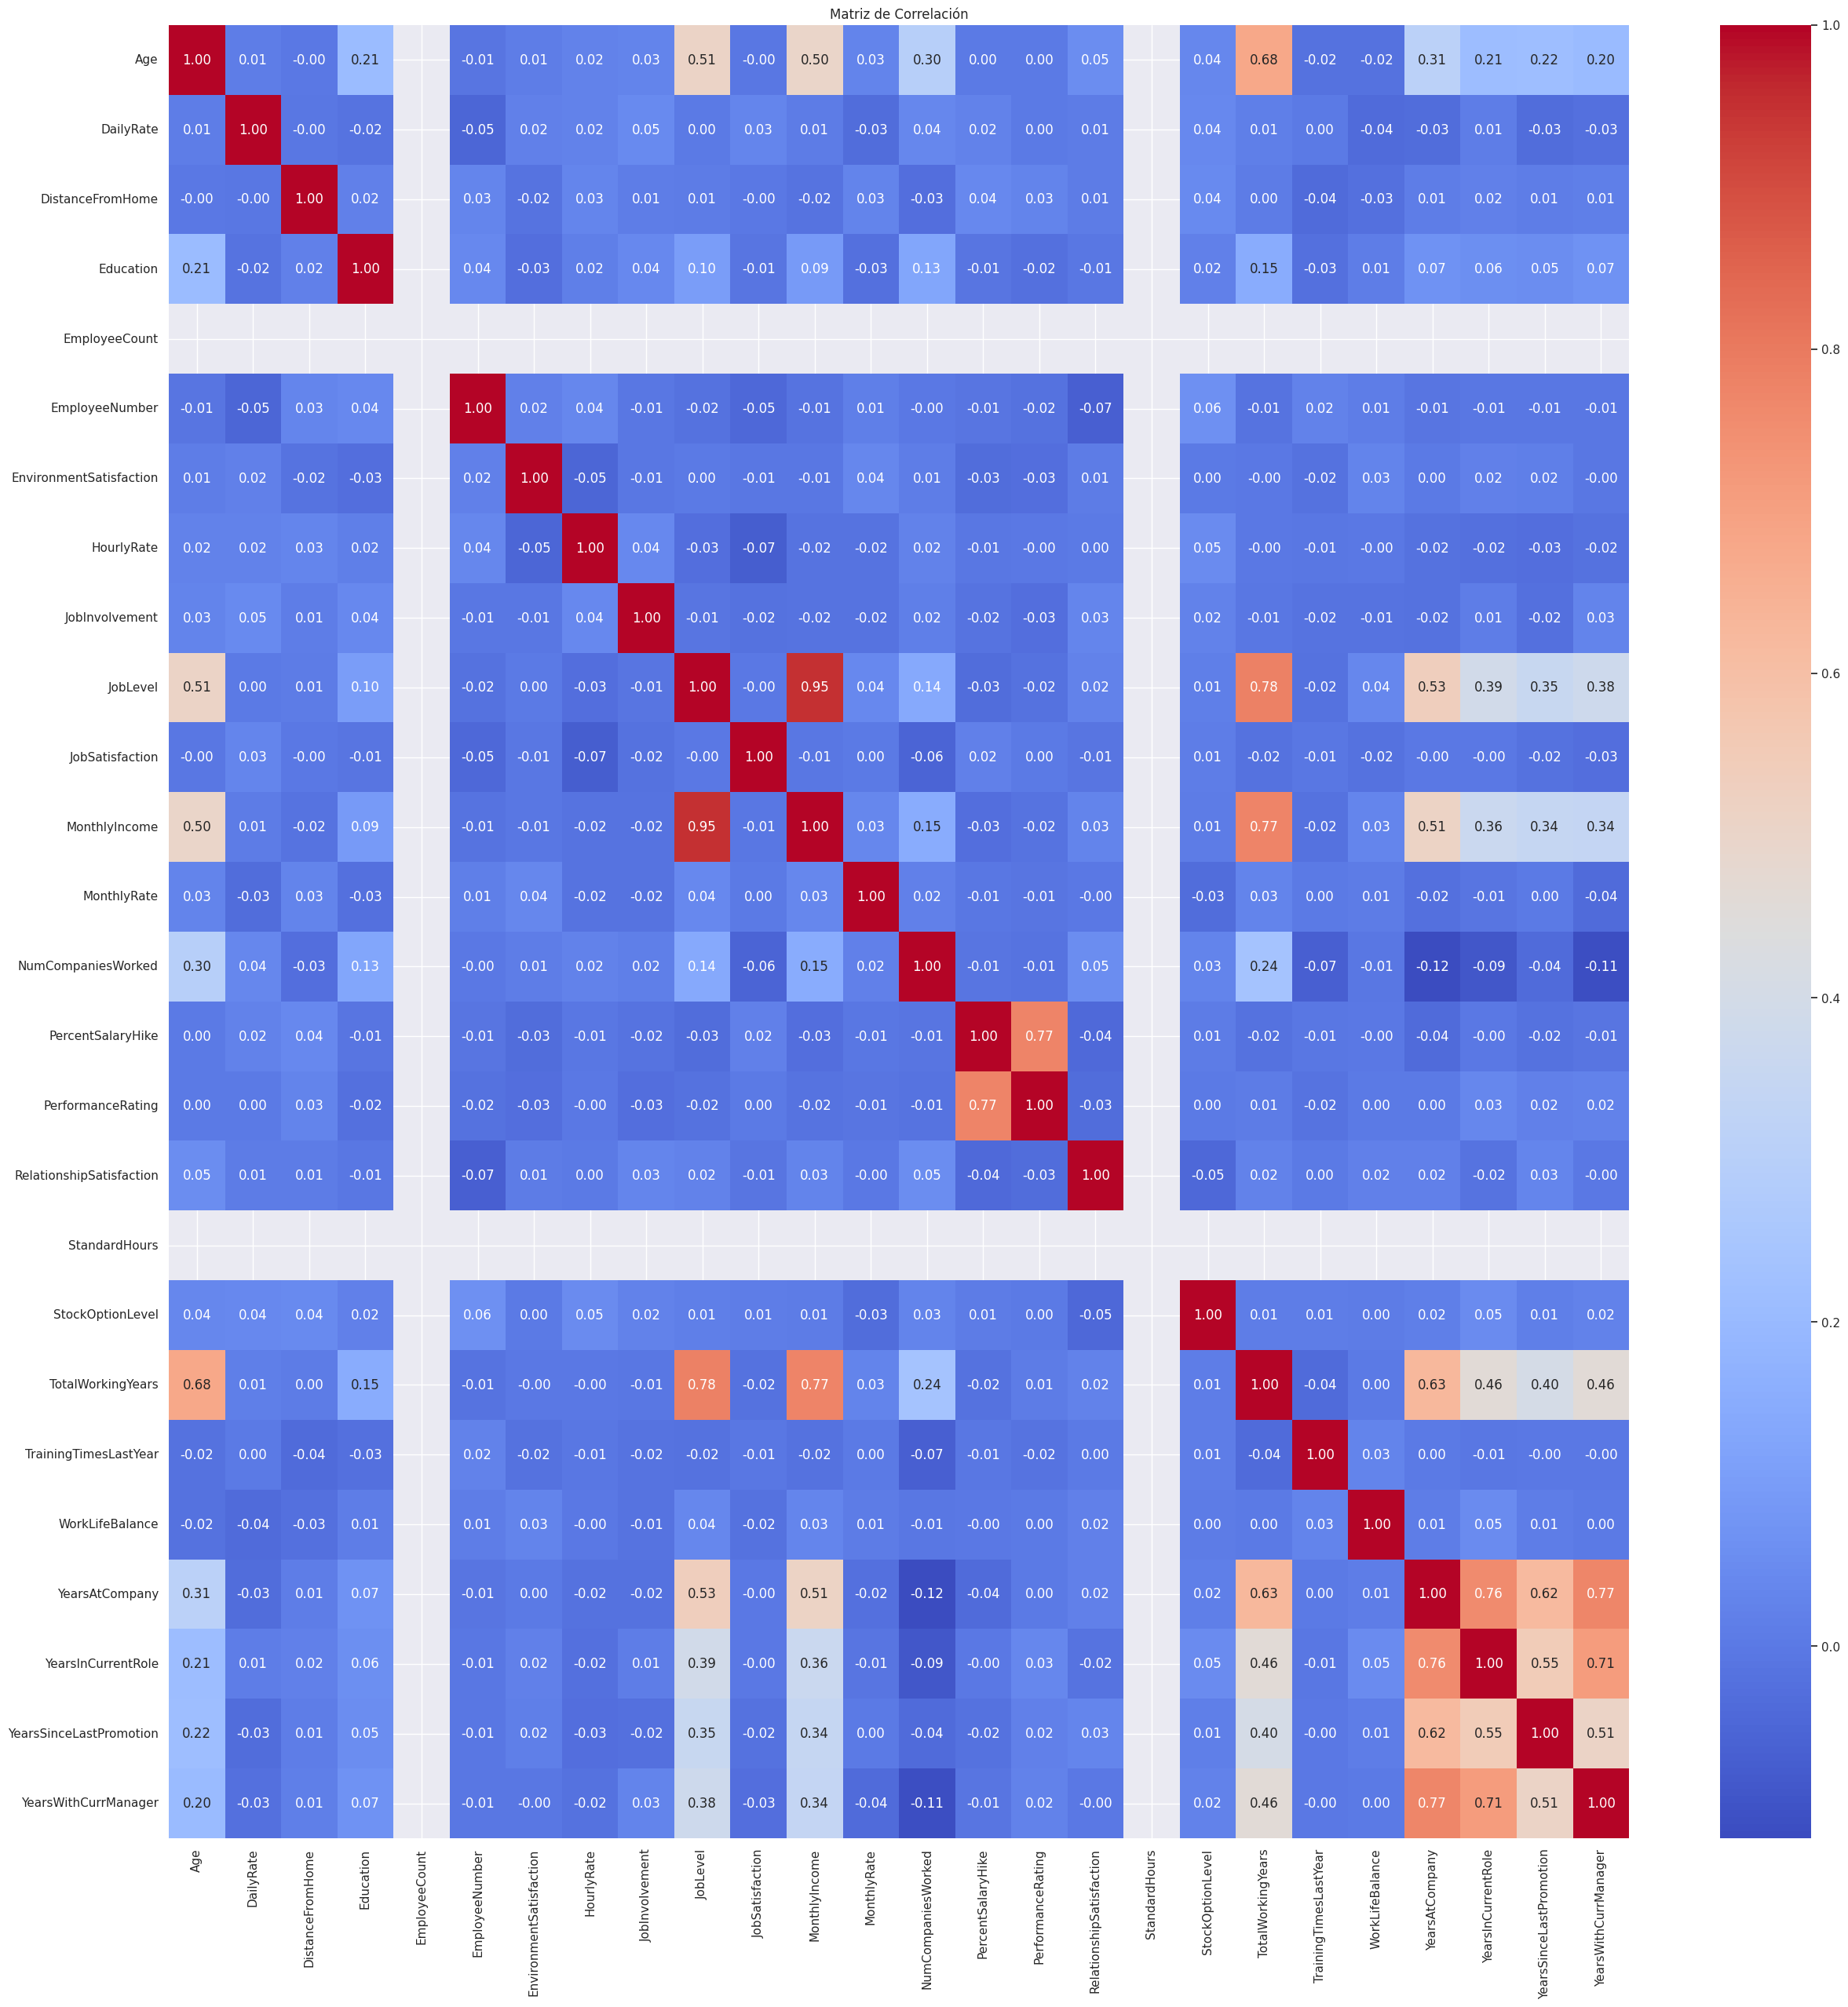

In [1432]:
# Calcular la matriz de correlación entre las variables, solo tomará en cuenta las numéricas
correlation_matrix_df = num_vars.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

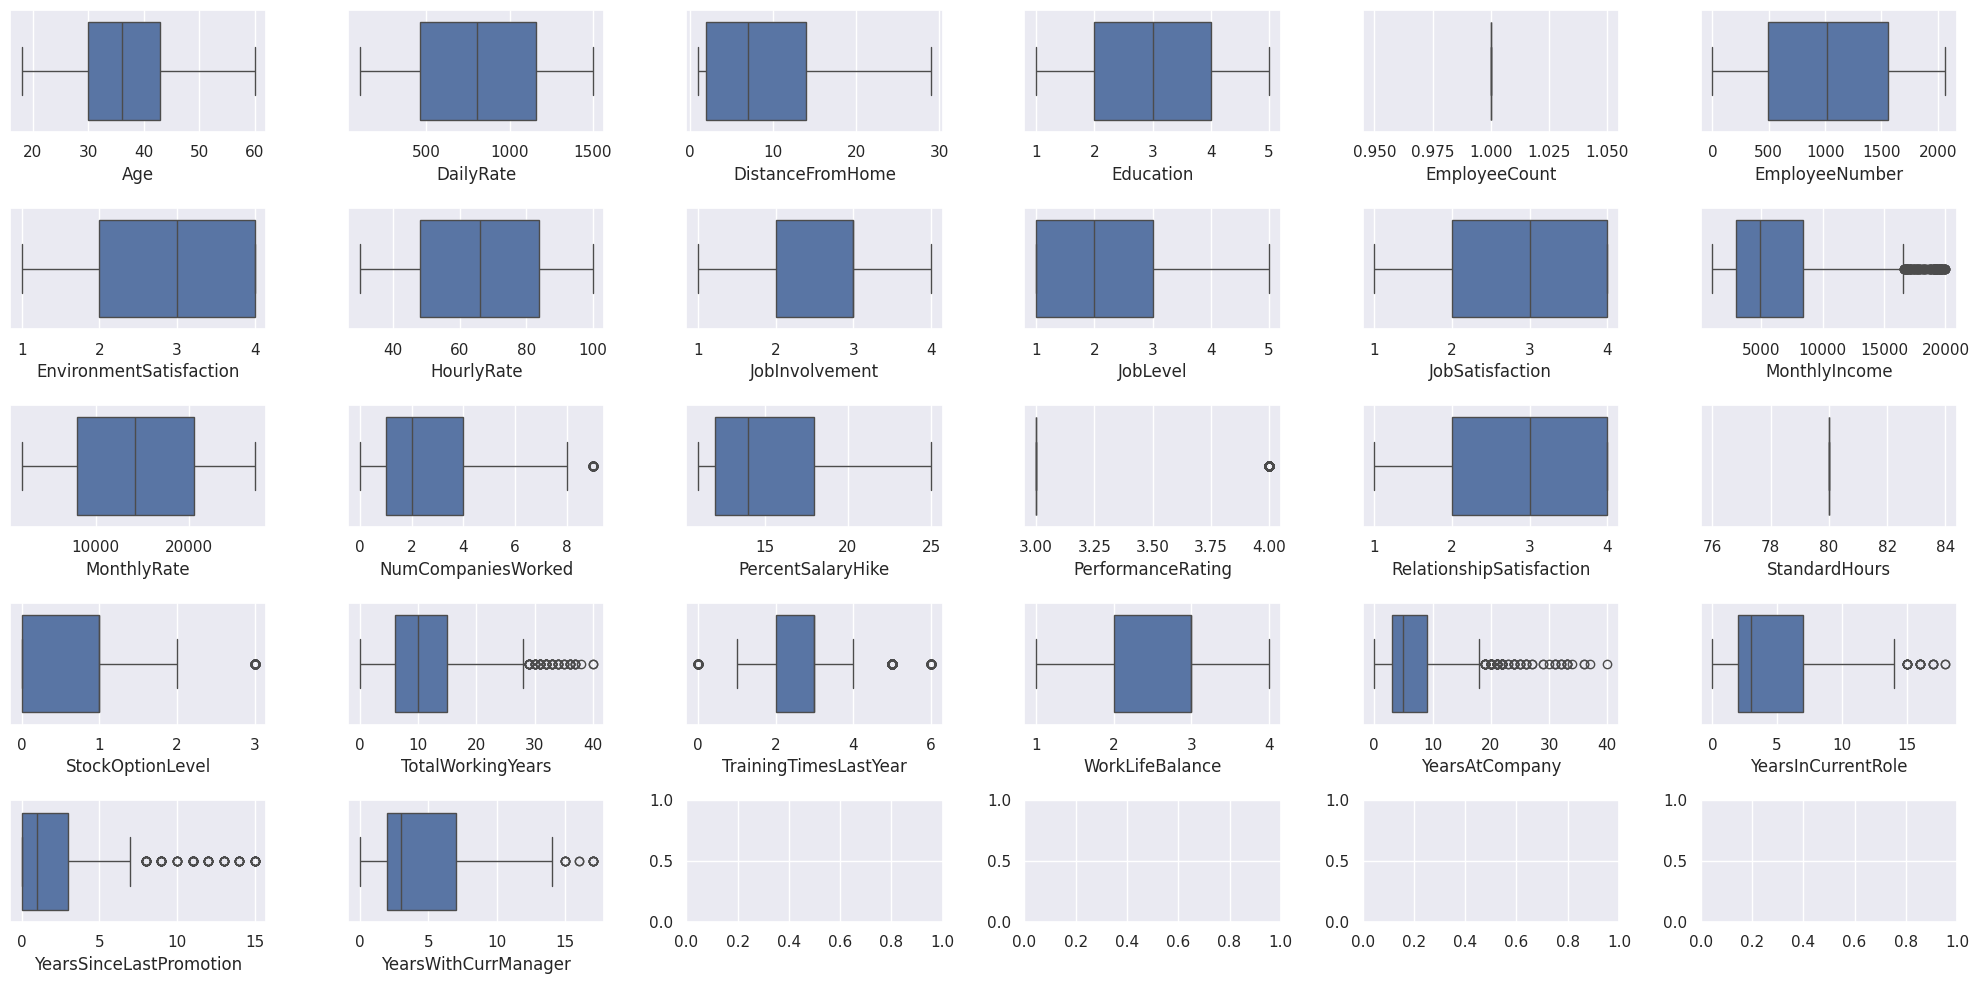

In [1433]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

1. **EmployeeCount**:
*Hipótesis:* Esta variable parece tener el mismo valor para todos los empleados en el conjunto de datos proporcionado. Si todas las muestras tienen el mismo valor, no proporciona información útil para predecir la atrición ya que no hay variabilidad en los datos.

En la tabla de correlación general nos indica que no hay manera de correlacionar, por lo que para confirmar si la variable 'EmployeeCount' tiene el mismo valor para todos los empleados en el conjunto de datos proporcionado, contaremos el número de valores únicos que tiene esta variable.
Si el número de valores únicos en 'EmployeeCount' es igual a 1, significa que todos los empleados tienen el mismo valor para esta variable. Esto confirmaría la hipótesis de que 'EmployeeCount' no proporciona información útil para predecir la atrición debido a la falta de variabilidad en los datos.

In [1434]:
# Contar el número de valores únicos en la columna 'EmployeeCount'
unique_employee_counts = df['EmployeeCount'].nunique()

# Mostrar el resultado
print("Número de valores únicos en EmployeeCount:", unique_employee_counts)

Número de valores únicos en EmployeeCount: 1


***Resultado = Se soporta la hipótesis.
Por lo que procederemos a eliminar ésta variable***

2. **StandardHours**:
*Hipótesis:* Esta variable parece tener el mismo valor para todos los empleados en el conjunto de datos proporcionado. Si todas las muestras tienen el mismo valor, no proporciona información útil para predecir la atrición ya que no hay variabilidad en los datos.

In [1435]:
# Contar el número de valores únicos en la columna 'EmployeeCount'
unique_StandardHours = df['StandardHours'].nunique()

# Mostrar el resultado
print("Número de valores únicos en StandardHours:", unique_StandardHours)

Número de valores únicos en StandardHours: 1


***Resultado = Se soporta la hipótesis. Por lo que procederemos a eliminar ésta variable***

3. **EmployeeNumber**:
*Hipótesis:*  Este atributo parece ser un identificador único para cada empleado y no está relacionado directamente con la atrición. No debería influir en la decisión de si un empleado dejará la empresa o no.

Para confirmar la hipótesis de que 'EmployeeNumber' es un identificador único para cada empleado y no está directamente relacionado con la atrición, podemos contar el número de valores únicos en esta columna y compararlo con el número total de filas en el conjunto de datos, donde si el número de valores únicos en 'EmployeeNumber' es igual al número total de filas en el conjunto de datos, eso significa que cada empleado tiene un identificador único y que 'EmployeeNumber' no está duplicado. Esto respaldaría la hipótesis de que 'EmployeeNumber' es un identificador único para cada empleado y no está directamente relacionado con la atrición.

In [1436]:
# Contar el número de valores únicos en la columna 'EmployeeNumber'
unique_employee_numbers = df['EmployeeNumber'].nunique()

# Obtener el número total de filas en el DataFrame
total_rows = df.shape[0]

# Mostrar los resultados
print("Número de valores únicos en EmployeeNumber:", unique_employee_numbers)
print("Número total de empleados en el conjunto de datos:", total_rows)

Número de valores únicos en EmployeeNumber: 1470
Número total de empleados en el conjunto de datos: 1470


***Resultado = Se soporta la hipótesis.
Por lo que procederemos a eliminar ésta variable***

4. **HourlyRate, MonthlyRate y DailyRate**:
*Hipótesis*: El salario por hora, por día y por mes, puede no ser una característica relevante para predecir la atrición ya si están intrísecamente relacionadas podriamos eliminar dos de ellas. Si la correlación entre estas variables es 1 o bien muy cercana a 1, podríamos eliminarlas para disminuir la complejidad del modelo.

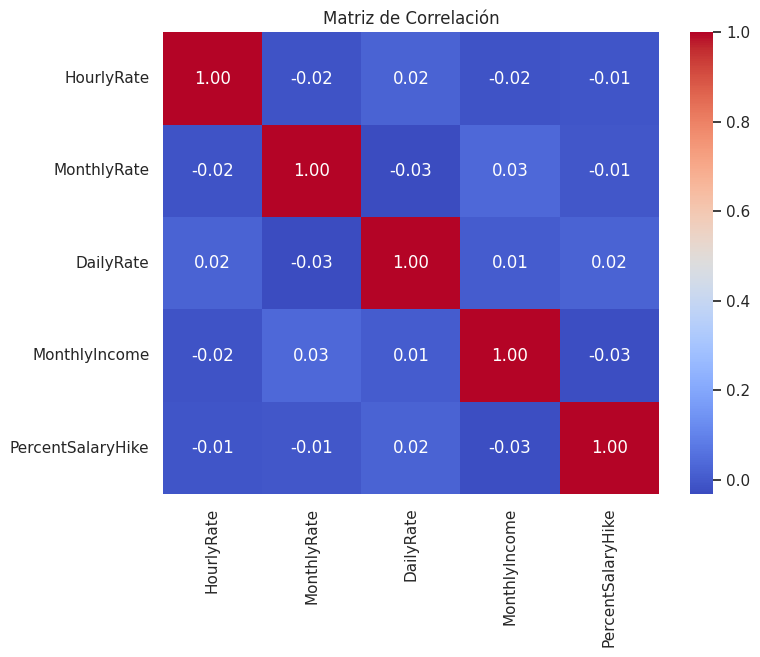

In [1437]:
# Calcular la matriz de correlación entre las variables
correlation_matrix = df[['HourlyRate', 'MonthlyRate', 'DailyRate', 'MonthlyIncome', 'PercentSalaryHike']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

***Resultado = No se soporta la hipótesis.
En base al análisis de ésta variable, nos damos cuenta que la base de datos está hecha de numeros aleatorios y no tiene un sentido lógico el nombre de la columna, por lo que prácticamente cada columna la podemos tratar como "X", así que eliminamos nuestra teoría de que guardan relación, los salarios por hora, por día y por mes.***

5. **JobLevel**: Esta variable podría estar correlacionada con otras características como el cargo del empleado (JobRole) o el salario mensual (MonthlyIncome). Si estas variables ya están presentes en el conjunto de datos, la inclusión de JobLevel podría agregar redundancia y complejidad al modelo sin proporcionar información adicional significativa sobre la atrición.

Text(0.5, 1.0, 'Matriz de Correlación')

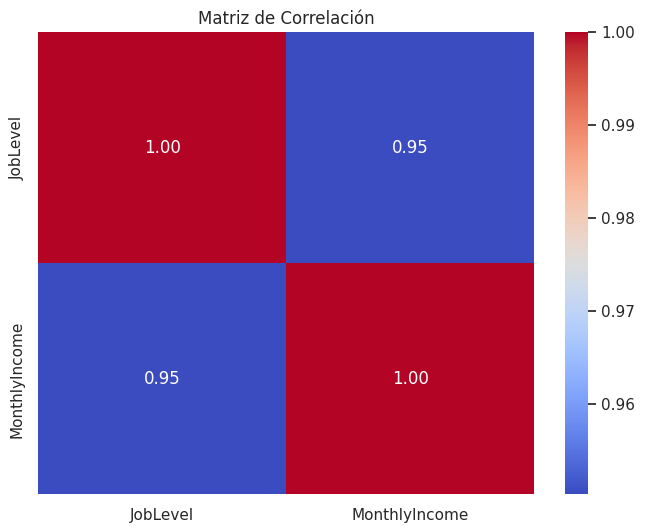

In [1438]:
# Calcular la matriz de correlación entre 'JobLevel', 'JobRole' y 'MonthlyIncome'
correlation_matrix = df[['JobLevel', 'JobRole', 'MonthlyIncome']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')

***Resultado = Se soporta la hipótesis. Aun no hemos convertido las variables categoricas en numéricas, por lo que no nos mostrará la correlación de JobRole, sin embargo JobLevel si guarda una estrecha relación con MonthlyIncome .95, por lo que podemos proceder a eliminarla.***

###Hacemos un análisis exploratorio de los datos Categóricos

In [1439]:
#Seleccionar datos categoricos
df_categoricos = df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]]
df_categoricos.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,No
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,No


In [1440]:
#Creamos la lista sin la variable predictora
cat_vars = df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"]]

Creamos graficas de barras para analizar como las diferentes opciones categoricas de cada variable se ven afectadas por Attrition

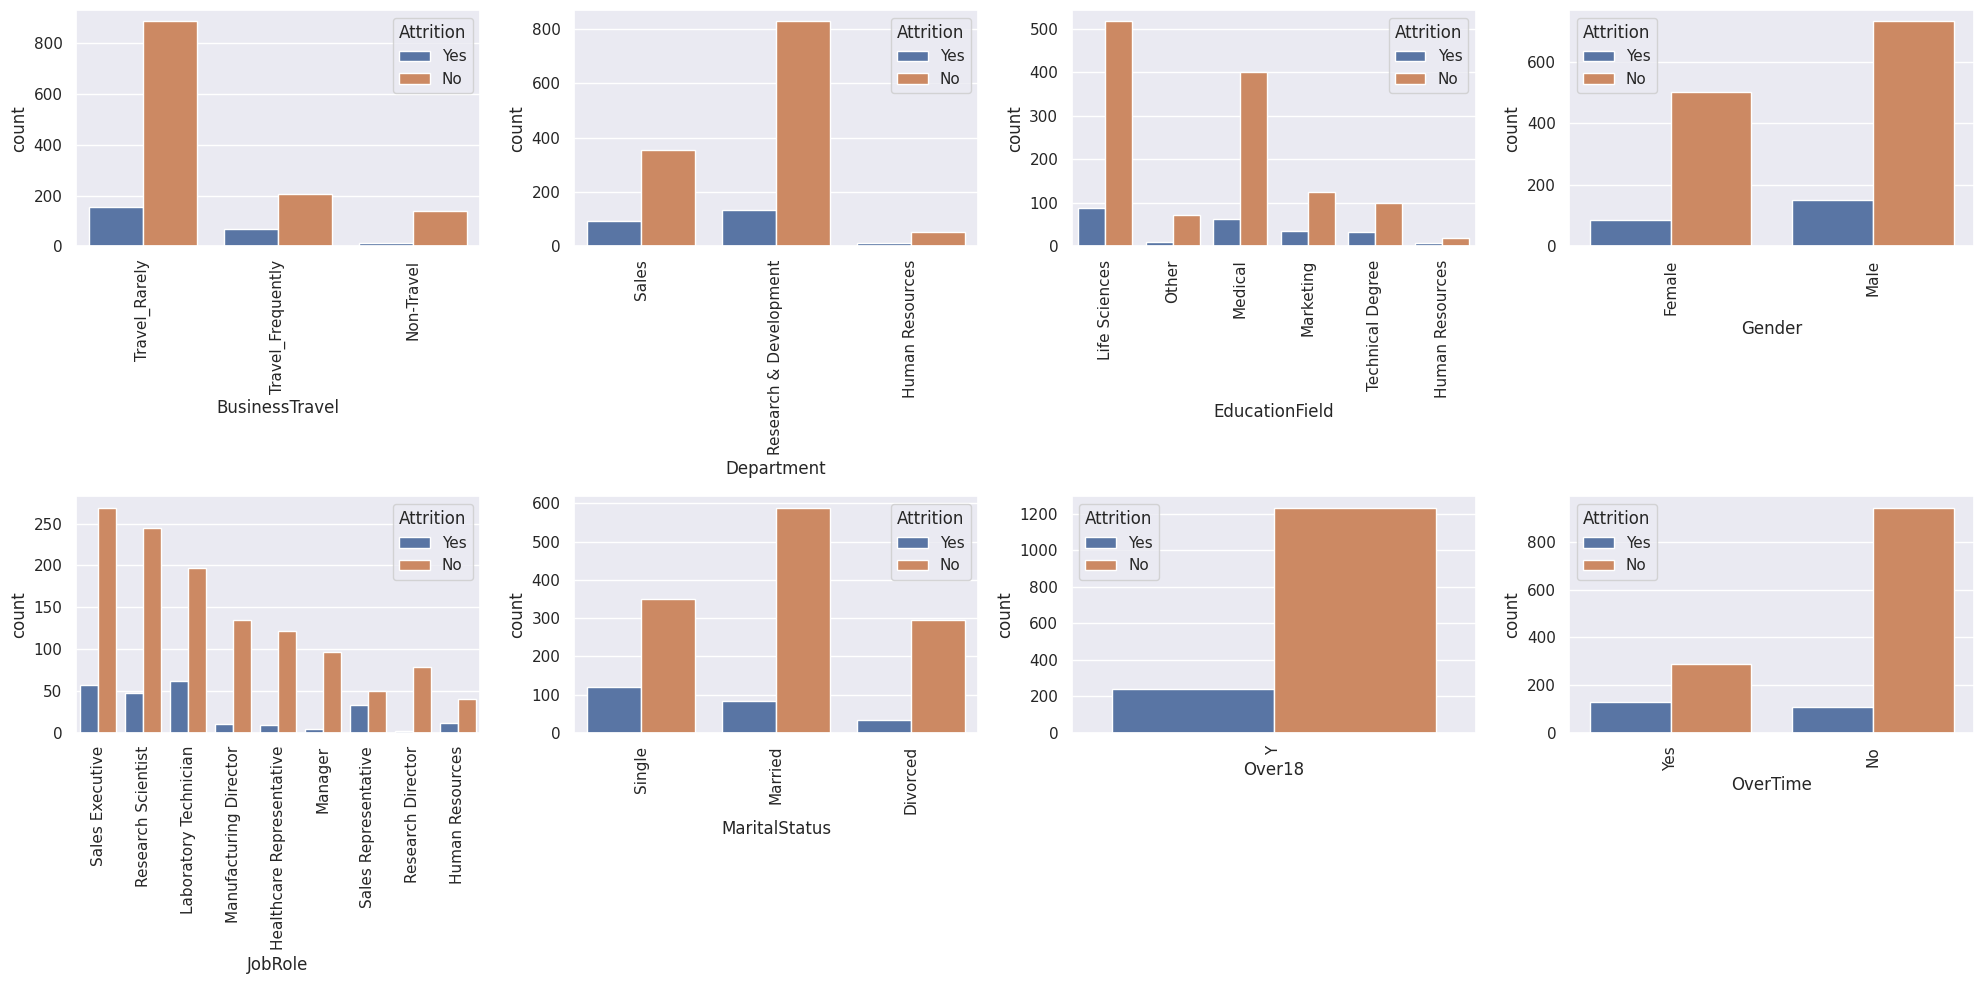

In [1441]:
#Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize = (20, 10))
axs = axs.flatten()

#Crear un countplot para cada variable categorica
for i, var in enumerate (cat_vars):
    sns.countplot(x=var, hue="Attrition", data = df_categoricos, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

#Ajustar espacio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()

Creamos histogramas para analizar como las diferentes opciones categoricas de cada variable se ven afectadas por Attrition de un ángulo diferente

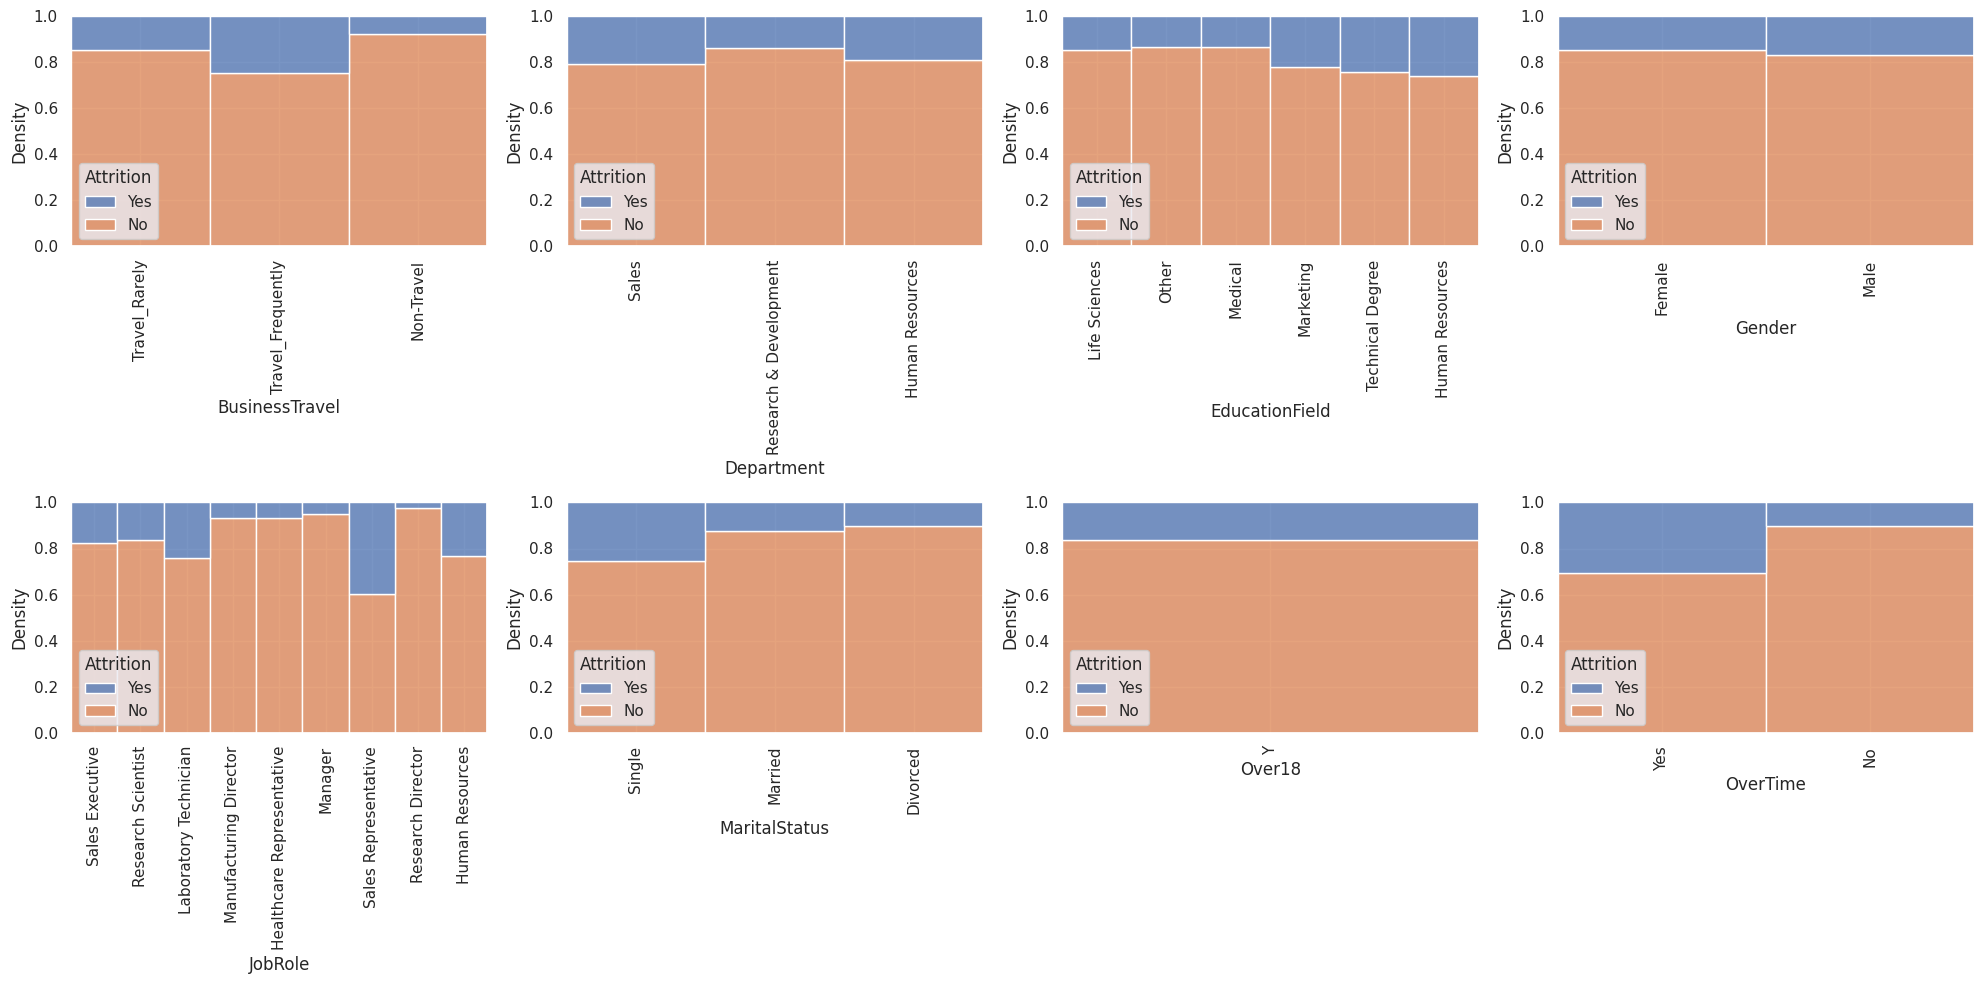

In [1442]:
#Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

#Crear histogramas para cada variable categorica
for i, var in enumerate (cat_vars):
    sns.histplot(x=var, hue="Attrition", data = df_categoricos, ax=axs[i], multiple = "fill", kde = False, element = "bars", fill= True, stat = "density")
    axs[i].set_xticklabels(df_categoricos[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

#Ajustar el especio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()

In [1443]:
df_categoricos.nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
Attrition         2
dtype: int64


Conclusiones de variables categóricas:

1.   **Over18:** Podemos entender que la columna Over18, no tiene significancia para nuestro analisis y podremos eliminarlo de la base de datos (lo confirmamos con el codigo posterior).
2.   **Gender:**prácticamente el Genero también muestra que tanto hombres y mujeres renuncian casi en idéntica proporción, sin embargo la conservaremos para futuros análisis y filtrados.
3.   **JobRole:**Se observa que los representantes de ventas son los que más renuncian, seguido de personal de RH y técnicos de laboratorios. Impresionantemente los Manager y Directores de Investigación son los que menos renuncian, lo que nos da pistas que otros renuncien y no managers muestra una lógica extraña.
4.   **MaritalStatus:**También observamos que los solteros son quienes más renuncian y tiene sentido debido a que pueden tomar más riesgos por no tener la misma responsabilidad como los casados y divorciados.
5.   **BusinessTravel:**Por otra parte observamos que entre más se viaja más probabilidad tienen de renunciar.

1. **Over18**:
*Hipótesis:* Esta variable parece tener el mismo valor para todos los empleados en el conjunto de datos proporcionado. Si todas las muestras tienen el mismo valor, no proporciona información útil para predecir la atrición ya que no hay variabilidad en los datos.

In [1444]:
# Contar el número de valores únicos en la columna 'EmployeeCount'
unique_Over18 = df['Over18'].nunique()

# Mostrar el resultado
print("Número de valores únicos en Over18:", unique_Over18)

Número de valores únicos en Over18: 1


***Resultado = Se soporta la hipótesis. Por lo que procederemos a eliminar ésta variable***

**Finalmente concluímos que debemos eliminar 5 variables: 'EmployeeCount', 'EmployeeNumber, 'JobLevel', 'Over18' y 'StandardHours'**

In [1445]:
# Eliminar múltiples columnas del DataFrame
columns_to_drop = ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'JobLevel', 'Over18', 'StandardHours']

# Separamos los factores de entrada y la variable de salida:
X1 = df.drop(columns_to_drop, axis=1)
y1 = df['Attrition']

In [1446]:
# Actualizar los datos en entrenamiento (70%) y temporal (30%) eliminando columnas innecesarias del exploratorio inicial -- Nota: Temporal incluye Validación y Prueba
X1train, X1temp, y1train, y1temp = train_test_split(X1, y1, test_size=0.3, random_state= None)

# Dividir el temporal en validación (50%) y prueba (50%)
X1val, X1test, y1val, y1test = train_test_split(X1temp, y1temp, test_size=0.5, random_state= None)

print("Entrenamiento X1:", X1train.shape,    '%.1f%%' % (100 * X1train.shape[0]  / (X1train.shape[0] + X1val.shape[0] + X1test.shape[0] )))
print("Validación    X1:", X1val.shape,      '%.1f%%' % (100 * X1val.shape[0]    / (X1train.shape[0] + X1val.shape[0] + X1test.shape[0] )))
print("Prueba        X1:", X1test.shape,     '%.1f%%' % (100 * X1test.shape[0]   / (X1train.shape[0] + X1val.shape[0] + X1test.shape[0] )))

print("Entrenamiento y1:", y1train.shape,    '%.1f%%' % (100 * y1train.shape[0]  / (y1train.shape[0] + y1val.shape[0] + y1test.shape[0] )))
print("Validación    y1:", y1val.shape,      '%.1f%%' % (100 * y1val.shape[0]    / (y1train.shape[0] + y1val.shape[0] + y1test.shape[0] )))
print("Prueba        y1:", y1test.shape,     '%.1f%%' % (100 * y1test.shape[0]   / (y1train.shape[0] + y1val.shape[0] + y1test.shape[0] )))

Entrenamiento X1: (1029, 29) 70.0%
Validación    X1: (220, 29) 15.0%
Prueba        X1: (221, 29) 15.0%
Entrenamiento y1: (1029,) 70.0%
Validación    y1: (220,) 15.0%
Prueba        y1: (221,) 15.0%


**c) Realiza el análisis que consideres adecuado para los datos de tipo numérico y con base a ello y evitando el filtrado de información (data-leakage), aplica las transformaciones que consideras adecuadas a los tres conjuntos . Indica cuáles fueron estas variables y explica el porqué de las transformaciones que aplicaste, en caso de haber aplicado alguna.**

In [1447]:
#Para evitar Data Leakage usaremos la base de datos X1Train, y así evitar la fuga de datos externa a los datos de entrenamiento, es decir, no debemos incluir datos que no estarían disponibles en un escenario real de predicción  (XVal y XTest)
X1train.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1455,40,Travel_Rarely,1322,Research & Development,2,4,Life Sciences,3,Male,52,2,Research Scientist,3,Single,2809,2725,2,No,14,3,4,0,8,2,3,2,2,2,2
508,35,Travel_Rarely,1017,Research & Development,6,4,Life Sciences,2,Male,82,1,Research Scientist,4,Single,6646,19368,1,No,13,3,2,0,17,3,3,17,11,11,8
1098,40,Non-Travel,1142,Research & Development,8,2,Life Sciences,4,Male,72,3,Healthcare Representative,4,Divorced,4069,8841,3,Yes,18,3,3,0,8,2,3,2,2,2,2
977,34,Non-Travel,999,Research & Development,26,1,Technical Degree,1,Female,92,2,Research Scientist,3,Divorced,2029,15891,1,No,20,4,3,3,5,2,3,5,4,0,0
641,32,Travel_Frequently,379,Sales,5,2,Life Sciences,2,Male,48,3,Sales Executive,2,Married,6524,8891,1,No,14,3,4,1,10,3,3,10,8,5,3


In [1448]:
num_vars_X1train = X1train[["Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction",
                           "HourlyRate", "JobInvolvement", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
                           "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel",
                           "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
                           "YearsSinceLastPromotion", "YearsWithCurrManager"]]

In [1449]:
print("Longitud de num_vars_X1train:", len(num_vars_X1train))

Longitud de num_vars_X1train: 1029


In [1450]:
print("Columnas de num_vars_X1train:", num_vars_X1train.columns)

Columnas de num_vars_X1train: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [1451]:
print("Número de columnas en num_vars_X1train:", len(num_vars_X1train.columns))

Número de columnas en num_vars_X1train: 22


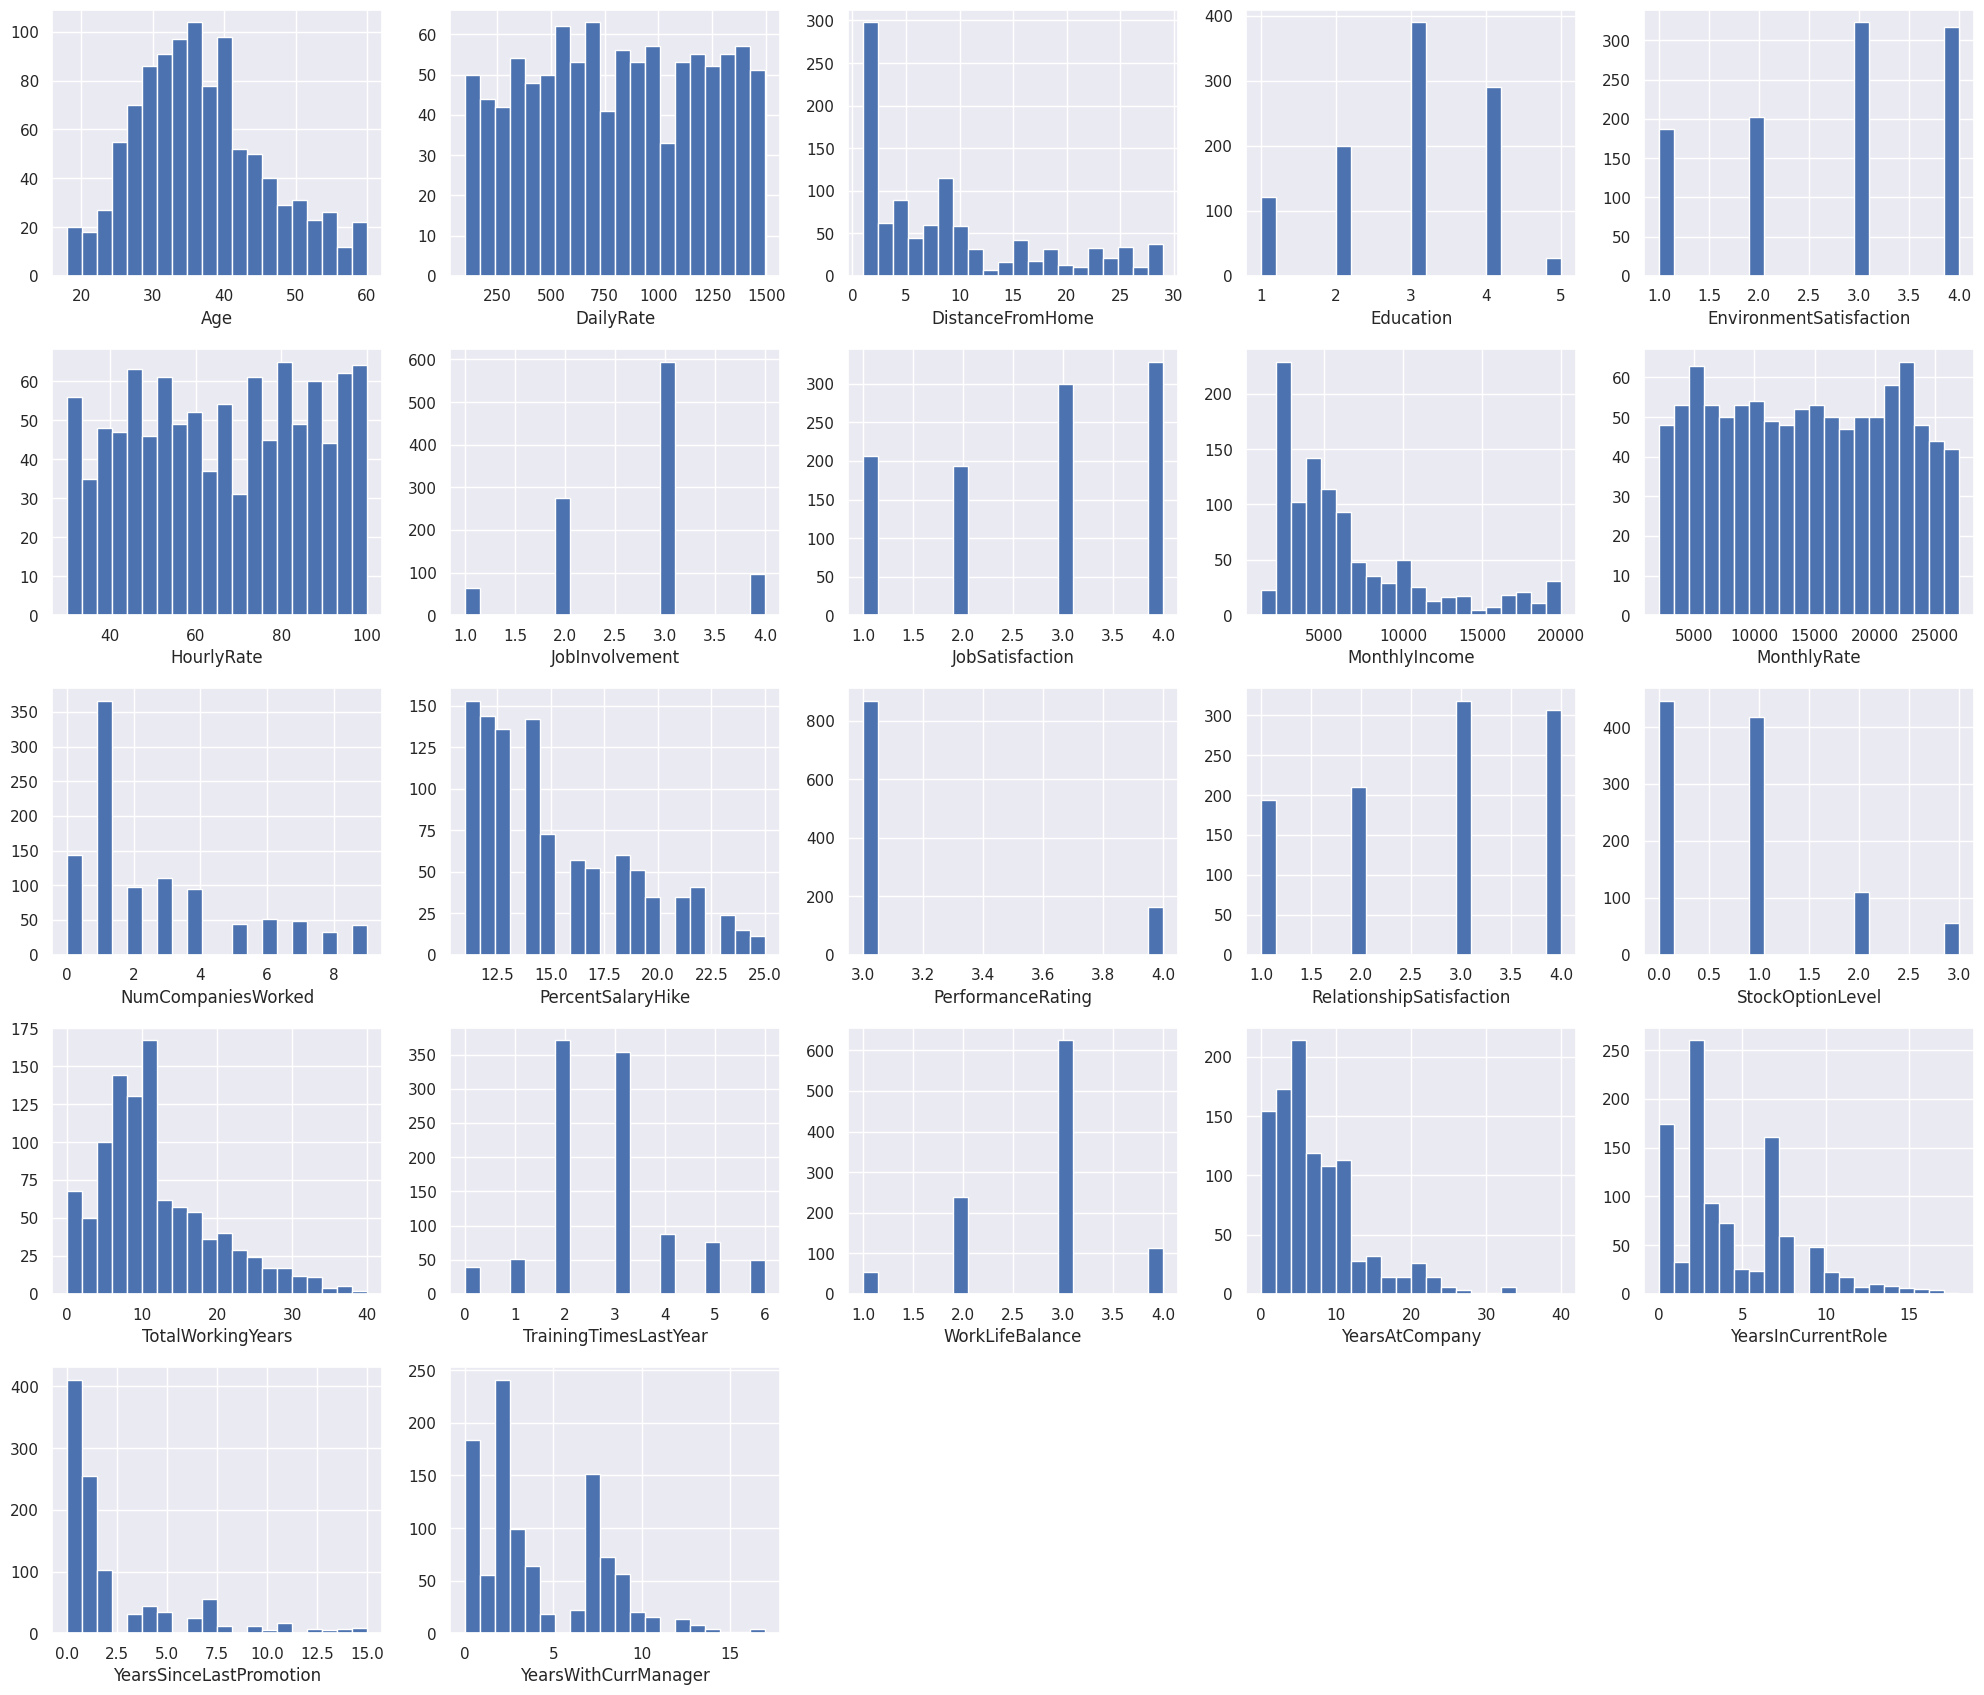

In [1452]:
# Variables de entrada del conjunto de Entrenamiento:

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Crear los histogramas para cada variable
for k, col in enumerate(num_vars_X1train.columns):
    plt.subplot(6, 5, k + 1)  # Organizar los subgráficos en una matriz de 6x5
    plt.hist(num_vars_X1train[col], bins=20)
    plt.xlabel(col)

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Todas las variables muestran consistencia por lo que no estaremos transformando ninguna por el momento. Probablemente posteriormente intentemos hacerlo para mejorar los resultados finales.

**d) Realiza el análisis que consideres adecuado para los datos de tipo categórico binario y con base a ello y evitando el filtrado de información, aplica la transformación LabelEncoder() de sklearn a estas variables.**

Nuevamente corremos nunique de categóricos para encontrar los binarios

In [1453]:
df_categoricos.nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
Attrition         2
dtype: int64

Gender, Overtime y Attrition son las 3 variables categóricas binarias que trabajaremos en el punto d)

#### Procesamiento de datos

Utilizamos pandas.Series.unique, lo cual devuelve valores únicos de una serie de objetos.

Los valor únicos se devuelven en orden de aparición. Los valores Únicos se basan en tablas hash, por lo tanto, NO se ordenan.
https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html


In [1454]:
X1train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [1455]:
X1train['OverTime'].unique()

array(['No', 'Yes'], dtype=object)

In [1456]:
y1train.unique()

array(['No', 'Yes'], dtype=object)

In [1457]:
# Usar numpy.unique() para obtener los valores únicos
unique_values = np.unique(y1train)

# Mostrar los valores únicos
print("Valores únicos en y1train:", unique_values)

Valores únicos en y1train: ['No' 'Yes']


Transformar datos
En general, los algoritmos de aprendizaje se benefician de la estandarización del conjunto de datos.
https://scikit-learn.org/stable/modules/preprocessing.html


In [1458]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X1train['Gender']= label_encoder.fit_transform(X1train['Gender'])
X1train['Gender'].unique()

array([1, 0])

In [1459]:
label_encoder = preprocessing.LabelEncoder()
X1train['OverTime']= label_encoder.fit_transform(X1train['OverTime'])
X1train['OverTime'].unique()

array([0, 1])

In [1460]:
label_encoder = preprocessing.LabelEncoder()
y1train = label_encoder.fit_transform(y1train)
np.unique(y1train)

array([0, 1])

In [1461]:
y1train_series = pd.Series(y1train)

In [1462]:
column_Attrition = ['Attrition']

# Crea un DataFrame de pandas a partir del arreglo de NumPy
y1train_df = pd.DataFrame(y1train, columns=column_Attrition)

In [1463]:
y1train_df.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


**e) Realiza el análisis que consideres adecuado para los datos de tipo categórico nominal y con base a ello, aplica la transformación llamada get_dummies() de Pandas a dichas variables. Usa además el argumento “drop_first” para generar “k-1” variables “dummies” a partir de los “k” niveles de cada variable nominal.**

In [1464]:
df_categoricos.nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
Attrition         2
dtype: int64

1. BusinessTravel = ordinal
2. Department = nominal
3. EducationField = nominal
4. JobRole = nominal
5. MaritalStatus = nominal



In [1465]:
print(X1train['Department'].value_counts())

Research & Development    671
Sales                     313
Human Resources            45
Name: Department, dtype: int64


In [1466]:
print(X1train['EducationField'].value_counts())

Life Sciences       432
Medical             323
Marketing           111
Technical Degree     93
Other                52
Human Resources      18
Name: EducationField, dtype: int64


In [1467]:
print(X1train['JobRole'].value_counts())

Sales Executive              232
Research Scientist           210
Laboratory Technician        170
Manufacturing Director       109
Healthcare Representative     93
Manager                       72
Sales Representative          57
Research Director             48
Human Resources               38
Name: JobRole, dtype: int64


In [1468]:
print(X1train['MaritalStatus'].value_counts())

Married     470
Single      333
Divorced    226
Name: MaritalStatus, dtype: int64


Creamos columnas dummies y habilitamos drop_first para eliminar un dato de la variable, ya que al sacrificarlo evitaremos la multicolinealidad y tendremos un set de datos más estable.

In [1469]:
Department_dummies = pd.get_dummies(X1train['Department'], drop_first=True)

In [1470]:
Department_dummies.head(2)

,Research & Development,Sales
1455,1,0
508,1,0


In [1471]:
EducationField_dummies = pd.get_dummies(X1train['EducationField'], drop_first=True)

In [1472]:
EducationField_dummies.head(2)

,Life Sciences,Marketing,Medical,Other,Technical Degree
1455,1,0,0,0,0
508,1,0,0,0,0


In [1473]:
JobRole_dummies = pd.get_dummies(X1train['JobRole'], drop_first=True)

In [1474]:
JobRole_dummies.head(2)

,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
1455,0,0,0,0,0,1,0,0
508,0,0,0,0,0,1,0,0


In [1475]:
MaritalStatus_dummies = pd.get_dummies(X1train['MaritalStatus'], drop_first=True)

In [1476]:
MaritalStatus_dummies.head(2)

,Married,Single
1455,0,1
508,0,1


In [1477]:
#X1train_reset_index = X1train.reset_index(drop=True)

In [1478]:
#Department_reset_index = Department_dummies.reset_index(drop=True)

In [1479]:
#EducationField_reset_index = EducationField_dummies.reset_index(drop=True)

In [1480]:
#JobRole_reset_index = JobRole_dummies.reset_index(drop=True)

In [1481]:
#MaritalStatus_reset_index = MaritalStatus_dummies.reset_index(drop=True)

In [1482]:
# Lista de variables a concatenar
#Variables_to_concat = [X1train_reset_index, Department_reset_index, EducationField_reset_index, JobRole_reset_index, MaritalStatus_reset_index]
Variables_to_concat = [X1train, Department_dummies, EducationField_dummies, JobRole_dummies, MaritalStatus_dummies]

In [1483]:
# Concatenamos las variables ficticias con el DataFrame original
X1train = pd.concat(Variables_to_concat, axis=1)

In [1484]:
X1train.head(8)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
1455,40,Travel_Rarely,1322,Research & Development,2,4,Life Sciences,3,1,52,2,Research Scientist,3,Single,2809,2725,2,0,14,3,4,0,8,2,3,2,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
508,35,Travel_Rarely,1017,Research & Development,6,4,Life Sciences,2,1,82,1,Research Scientist,4,Single,6646,19368,1,0,13,3,2,0,17,3,3,17,11,11,8,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1098,40,Non-Travel,1142,Research & Development,8,2,Life Sciences,4,1,72,3,Healthcare Representative,4,Divorced,4069,8841,3,1,18,3,3,0,8,2,3,2,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
977,34,Non-Travel,999,Research & Development,26,1,Technical Degree,1,0,92,2,Research Scientist,3,Divorced,2029,15891,1,0,20,4,3,3,5,2,3,5,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
641,32,Travel_Frequently,379,Sales,5,2,Life Sciences,2,1,48,3,Sales Executive,2,Married,6524,8891,1,0,14,3,4,1,10,3,3,10,8,5,3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
775,43,Travel_Rarely,415,Sales,25,3,Medical,3,1,79,2,Sales Executive,4,Divorced,10798,5268,5,0,13,3,3,1,18,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1422,35,Travel_Rarely,1490,Research & Development,11,4,Medical,4,1,43,3,Laboratory Technician,3,Married,2660,20232,7,1,11,3,3,1,5,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1220,36,Travel_Rarely,530,Sales,2,4,Life Sciences,3,0,51,3,Sales Representative,4,Single,4502,7439,3,0,15,3,3,0,17,2,2,13,7,6,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [1485]:
X1train_columns_to_drop = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
X1train = X1train.drop(columns = X1train_columns_to_drop)

In [1486]:
X1train.head(8)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
1455,40,Travel_Rarely,1322,2,4,3,1,52,2,3,2809,2725,2,0,14,3,4,0,8,2,3,2,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
508,35,Travel_Rarely,1017,6,4,2,1,82,1,4,6646,19368,1,0,13,3,2,0,17,3,3,17,11,11,8,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1098,40,Non-Travel,1142,8,2,4,1,72,3,4,4069,8841,3,1,18,3,3,0,8,2,3,2,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
977,34,Non-Travel,999,26,1,1,0,92,2,3,2029,15891,1,0,20,4,3,3,5,2,3,5,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
641,32,Travel_Frequently,379,5,2,2,1,48,3,2,6524,8891,1,0,14,3,4,1,10,3,3,10,8,5,3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
775,43,Travel_Rarely,415,25,3,3,1,79,2,4,10798,5268,5,0,13,3,3,1,18,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1422,35,Travel_Rarely,1490,11,4,4,1,43,3,3,2660,20232,7,1,11,3,3,1,5,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1220,36,Travel_Rarely,530,2,4,3,0,51,3,4,4502,7439,3,0,15,3,3,0,17,2,2,13,7,6,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


**f) Realiza una inspección de las variables categóricas ordinales y determina qué transformaciones aplicar, en caso de aplicar alguna. Indica cuáles son estas variables y justifica la decisión que tomes.**

In [1487]:
from sklearn.preprocessing import OrdinalEncoder

# Definir el orden de las categorías
categories = [['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]

# Crear una instancia de OrdinalEncoder y ajustar-transformar los datos
encoder = OrdinalEncoder(categories=categories)
X1train['BusinessTravel'] = encoder.fit_transform(X1train[['BusinessTravel']])

In [1488]:
X1train.head(8)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
1455,40,1.0,1322,2,4,3,1,52,2,3,2809,2725,2,0,14,3,4,0,8,2,3,2,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
508,35,1.0,1017,6,4,2,1,82,1,4,6646,19368,1,0,13,3,2,0,17,3,3,17,11,11,8,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1098,40,0.0,1142,8,2,4,1,72,3,4,4069,8841,3,1,18,3,3,0,8,2,3,2,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
977,34,0.0,999,26,1,1,0,92,2,3,2029,15891,1,0,20,4,3,3,5,2,3,5,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
641,32,2.0,379,5,2,2,1,48,3,2,6524,8891,1,0,14,3,4,1,10,3,3,10,8,5,3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
775,43,1.0,415,25,3,3,1,79,2,4,10798,5268,5,0,13,3,3,1,18,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1422,35,1.0,1490,11,4,4,1,43,3,3,2660,20232,7,1,11,3,3,1,5,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1220,36,1.0,530,2,4,3,0,51,3,4,4502,7439,3,0,15,3,3,0,17,2,2,13,7,6,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [1489]:
X1val.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
640,24,Non-Travel,1269,Research & Development,4,1,Life Sciences,1,Male,46,2,Laboratory Technician,4,Married,3162,10778,0,No,17,3,4,0,6,2,2,5,2,3,4
507,29,Travel_Rarely,1176,Sales,3,2,Medical,2,Female,62,3,Sales Executive,3,Married,5561,3487,1,No,14,3,1,1,6,5,2,6,0,1,2
1388,32,Non-Travel,1146,Research & Development,15,4,Medical,3,Female,34,3,Healthcare Representative,4,Divorced,6667,16542,5,No,18,3,2,1,9,6,3,5,1,1,2
162,28,Travel_Rarely,440,Research & Development,21,3,Medical,3,Male,42,3,Research Scientist,4,Married,2713,6672,1,No,11,3,3,1,5,2,1,5,2,0,2
1158,37,Travel_Rarely,671,Research & Development,19,3,Life Sciences,3,Male,85,3,Manufacturing Director,3,Married,5768,26493,3,No,17,3,1,3,9,2,2,4,3,0,2


### **PARTE 2: Análisis exploratorio entre factores**
   --> MIGUEL <--

#### **3) Se pueden analizar una buena cantidad relaciones entre los factores y la variable de salida “Attrition” (la decisión de dejar un puesto). A manera de ejemplos, obtener solo algunas de estas relaciones gráficas:**


**a) Las variables “Age” y “Attrition”.**

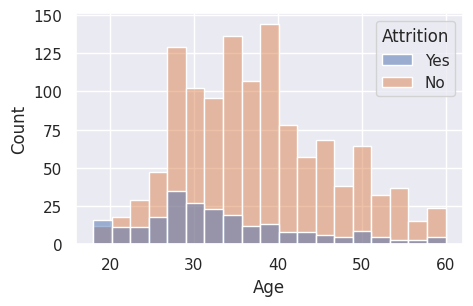

In [1490]:
# Al parecer, las personas menores 35 (aprox) tienden a renunciar con mayor
# frecuencia que los mayores de 35-40 años

fig, axs = plt.subplots(figsize=(5, 3))
sns.histplot(x="Age", hue='Attrition', data=df)
plt.show()

**b) Las variables “Department” y “Attrition”.**

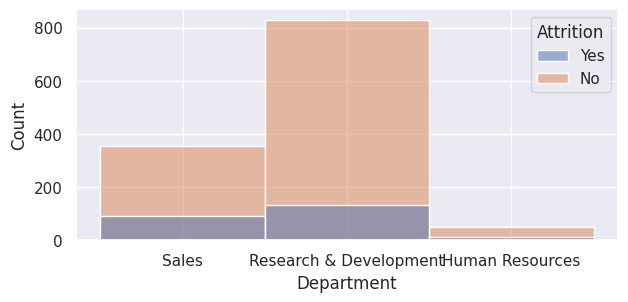

In [1491]:
# Al parecer, ...

fig, axs = plt.subplots(figsize=(7, 3))
sns.histplot(x="Department", hue='Attrition', data=df)
plt.show()

**c) Las variables “Gender” y “Attrition”.**

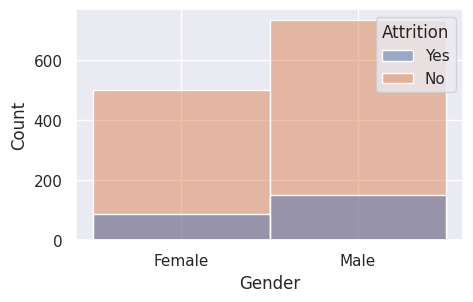

In [1492]:
# No hay diferencias significativas

fig, axs = plt.subplots(figsize=(5, 3))
sns.histplot(x="Gender", hue='Attrition', data=df)
plt.show()

**d) Incluye alguna otra relación o relaciones que consideres relevantes.**


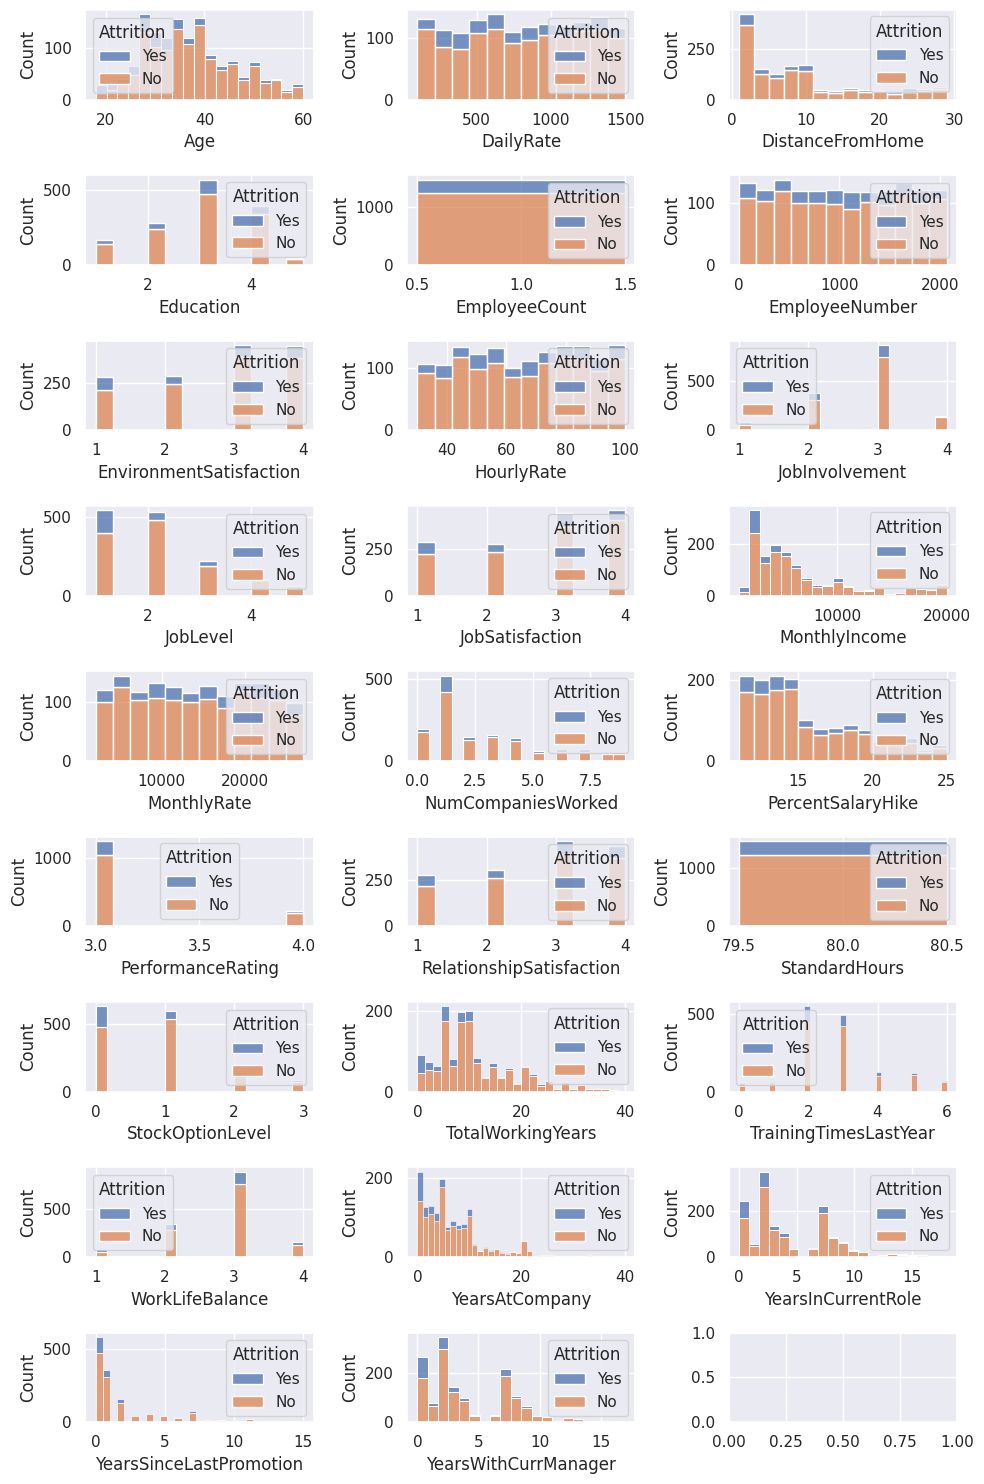

In [1493]:
# Las variables “Attrition” y:
  # “DistanceFromHome”, “JobLevel”, “MonthlyIncome”, "NumCompaniesWorked"
  # "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany"
  # "YearsInCurrentRole"

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(10, 15))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, hue='Attrition', data=df, ax=axs[i], multiple="stack")

fig.tight_layout()

plt.show()

**e) Con base a los gráficos anteriores ¿qué conclusiones puedes generar para entender mejor el problema?**

*NOTA: Puedes seleccionar el tipo de gráfico que consideres más adecuado, de acuerdo al tipo de variables que estás considerando.*

Con excepción de “DistanceFromHome”, el resto de las relaciones identificadas en el inciso d) parecen tener sentido.
Es decir, tiene sentido que un mayor nivel de attrition se presente en personal de niveles más bien bajos, con un salario mensual menor, y un historial de incrementos salariales menores (es decir, menores motivaciones financiaras para quedarse en su empleo); menos antigüedad en la empresa (es decir, menos compromiso y fit con la cultura), etc.

Algunas variables interesantes a explorar en mayor detalle: al parecer, personal que vive mas cerca de la oficina también tiende a presentar mayor attrition, lo cual no tiene mucha lógica


### **PARTE 3: Modelado**

#### **4) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.**

##### MSR: Esto requiere primero convertir categoricos a numericos, e.g., "BusinessTravel", antes de hacer el escalado.
##### Ciudado! etiquetar a Xtrain, no a df

In [1494]:
from sklearn import preprocessing

# Lista de cols a transformar:
columnas_a_transformar = ["BusinessTravel", "Department", "EducationField",
                          "Gender", "JobRole", "MaritalStatus", "Over18",
                          "OverTime"]

# Crear el codificador de etiquetas:
label_encoder = preprocessing.LabelEncoder()

# Iterar en cada columna y aplicar la transformación:
for columna in columnas_a_transformar:
    Xtrain[columna] = label_encoder.fit_transform(Xtrain[columna])

# Verificar transformación:
for columna in columnas_a_transformar:
    print(f'Columna: {columna}')
    print(Xtrain[columna].unique())

Columna: BusinessTravel
[2 1 0]
Columna: Department
[2 1 0]
Columna: EducationField
[2 1 3 5 0 4]
Columna: Gender
[1 0]
Columna: JobRole
[7 2 4 5 6 3 8 1 0]
Columna: MaritalStatus
[0 1 2]
Columna: Over18
[0]
Columna: OverTime
[0 1]


In [1495]:
Xtrain.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
628,37,2,342,2,16,4,2,1,868,4,1,66,2,2,7,3,0,6334,24558,4,0,0,19,3,4,80,2,9,2,3,1,0,0,0
236,33,2,465,1,2,2,1,1,328,1,0,39,3,1,2,1,1,2707,21509,7,0,0,20,4,1,80,0,13,3,4,9,7,1,7
255,25,2,685,1,1,3,1,1,350,1,0,62,3,2,4,3,1,4898,7505,0,0,0,12,3,4,80,2,5,3,3,4,2,1,2


In [1496]:
# Escalando los datos de entrada en el intervalo [0,1].
# Usamos primero solamente los datos de Entrenamiento para
# evitar el filtrado de información:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

Xtrainsc = sc.fit_transform(Xtrain)

Xtrainsc = pd.DataFrame(Xtrainsc, columns=Xtrain.columns)
Xtrainsc.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.452381,1.0,0.171920,1.0,0.535714,0.75,0.4,0.0,0.419448,1.0,1.0,0.514286,0.333333,0.25,0.875,0.666667,0.0,0.280411,0.901988,0.444444,0.0,0.0,0.571429,0.0,1.0,0.0,0.666667,0.225,0.333333,0.666667,0.025,0.000000,0.000000,0.000000
1,0.357143,1.0,0.260029,0.5,0.035714,0.25,0.2,0.0,0.158200,0.0,0.0,0.128571,0.666667,0.00,0.250,0.000000,0.5,0.089415,0.779562,0.777778,0.0,0.0,0.642857,1.0,0.0,0.0,0.000000,0.325,0.500000,1.000000,0.225,0.388889,0.066667,0.411765
2,0.166667,1.0,0.417622,0.5,0.000000,0.50,0.2,0.0,0.168844,0.0,0.0,0.457143,0.666667,0.25,0.500,0.666667,0.5,0.204792,0.217266,0.000000,0.0,0.0,0.071429,0.0,1.0,0.0,0.666667,0.125,0.500000,0.666667,0.100,0.111111,0.066667,0.117647


In [1497]:
# Reemplazar "Yes" con 1 y "No" con 0
ytrain.replace({'Yes': 1, 'No': 0}, inplace=True)
ytrain.head(3)

628    0
236    1
255    0
Name: Attrition, dtype: int64

In [1498]:
Xtrain.shape

(1029, 34)

In [1499]:
ytrain.shape

(1029,)

In [1500]:
# Imputar el modelo, una vez que ya contamos con el set de entrenamiento escalado:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(Xtrain, ytrain)

LogisticRegression(random_state=0)

##### MSR: Transformacion y escalado de conjunto test
##### Ciudado! etiquetar a Xtest, ytest; no a df

In [1501]:
# Lista de cols a transformar, en el conjunto de prueba ("Xtest"):
columnas_a_transformar = ["BusinessTravel", "Department", "EducationField",
                          "Gender", "JobRole", "MaritalStatus", "Over18",
                          "OverTime"]

# Crear el codificador de etiquetas:
label_encoder = preprocessing.LabelEncoder()

# Iterar en cada columna y aplicar la transformación:
for columna in columnas_a_transformar:
    Xtest[columna] = label_encoder.fit_transform(Xtest[columna])

# Verificar transformación:
for columna in columnas_a_transformar:
    print(f'Columna: {columna}')
    print(Xtest[columna].unique())

Columna: BusinessTravel
[2 0 1]
Columna: Department
[1 2 0]
Columna: EducationField
[5 3 0 4 1 2]
Columna: Gender
[0 1]
Columna: JobRole
[2 3 7 1 5 6 0 4 8]
Columna: MaritalStatus
[1 2 0]
Columna: Over18
[0]
Columna: OverTime
[0 1]


In [1502]:
# Escalado de conjunto test:
Xtestsc = sc.fit_transform(Xtest)

Xtestsc = pd.DataFrame(Xtestsc, columns=Xtest.columns)
Xtestsc.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.268293,1.0,0.740847,0.5,0.178571,0.5,1.0,0.0,0.637561,0.000000,0.0,0.257143,0.333333,0.25,0.250,1.0,0.5,0.183483,0.865028,0.000000,0.0,0.0,0.071429,0.0,0.000000,0.0,0.333333,0.250000,1.000000,0.666667,0.28125,0.117647,0.400000,0.4375
1,0.317073,1.0,0.279253,0.5,0.321429,0.5,0.6,0.0,0.737561,0.666667,1.0,0.485714,0.666667,0.50,0.375,1.0,1.0,0.546337,0.761244,0.222222,0.0,0.0,1.000000,1.0,0.333333,0.0,0.000000,0.250000,0.833333,1.000000,0.15625,0.117647,0.000000,0.0000
2,0.829268,1.0,0.094760,1.0,0.000000,0.0,0.6,0.0,0.330732,1.000000,0.0,0.057143,0.666667,0.25,0.875,0.0,1.0,0.389340,0.211096,0.777778,0.0,0.0,0.642857,1.0,1.000000,0.0,0.000000,0.472222,0.333333,1.000000,0.43750,0.411765,0.533333,0.6250


In [1503]:
# Reemplazar "Yes" con 1 y "No" con 0 ...en "ytest"
ytest.replace({'Yes': 1, 'No': 0}, inplace=True)
ytest.head(3)

941     0
1075    0
502     0
Name: Attrition, dtype: int64

In [1504]:
# Utilizando el set de Xtest
from sklearn.metrics import accuracy_score
ypred = LR.predict(Xtest)
print("Accuracy Score :", round(accuracy_score(ytest, ypred)*100 ,1), "%")

Accuracy Score : 81.0 %


In [1505]:
from sklearn.metrics import classification_report
print (classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       179
           1       0.00      0.00      0.00        42

    accuracy                           0.81       221
   macro avg       0.40      0.50      0.45       221
weighted avg       0.66      0.81      0.72       221



**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

In [1506]:
# Utilizando el set de Xtrain
  ## Accuracy Score : 84.2 %

ypred = LR.predict(Xtrain)
print("Accuracy Score :", round(accuracy_score(ytrain, ypred)*100 ,1), "%")

Accuracy Score : 84.2 %


##### MSR: Transformacion y escalado de conjunto val
##### Ciudado! etiquetar a Xval, yval; no al df completo

In [1507]:
# Lista de cols a transformar, en el conjunto de validación ("Xval"):
columnas_a_transformar = ["BusinessTravel", "Department", "EducationField",
                          "Gender", "JobRole", "MaritalStatus", "Over18",
                          "OverTime"]

# Crear el codificador de etiquetas:
label_encoder = preprocessing.LabelEncoder()

# Iterar en cada columna y aplicar la transformación:
for columna in columnas_a_transformar:
    Xval[columna] = label_encoder.fit_transform(Xval[columna])

# Verificar transformación:
for columna in columnas_a_transformar:
    print(f'Columna: {columna}')
    print(Xval[columna].unique())

Columna: BusinessTravel
[0 2 1]
Columna: Department
[1 2 0]
Columna: EducationField
[5 3 1 4 2 0]
Columna: Gender
[1 0]
Columna: JobRole
[6 4 3 5 2 7 0 8 1]
Columna: MaritalStatus
[0 1 2]
Columna: Over18
[0]
Columna: OverTime
[0 1]


In [1508]:
# Escalado de conjunto validación:
Xvalsc = sc.fit_transform(Xval)

Xvalsc = pd.DataFrame(Xvalsc, columns=Xval.columns)
Xvalsc.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.375,0.0,0.482759,0.5,0.107143,0.5,1.0,0.0,0.856305,1.000000,1.0,0.857143,0.666667,0.25,0.75,0.333333,0.0,0.105861,0.161107,0.555556,0.0,0.0,0.285714,0.0,1.000000,0.0,0.666667,0.297297,0.333333,0.333333,0.250000,0.5000,0.066667,0.411765
1,0.275,1.0,0.441810,0.5,0.250000,0.0,0.6,0.0,0.552786,0.333333,1.0,0.700000,0.333333,0.25,0.50,1.000000,0.5,0.211617,0.629832,0.111111,0.0,1.0,0.285714,0.0,0.666667,0.0,0.333333,0.270270,0.333333,0.333333,0.277778,0.4375,0.066667,0.117647
2,0.250,1.0,0.704023,0.5,1.000000,0.0,0.2,0.0,0.730694,0.666667,1.0,0.942857,0.000000,0.25,0.50,0.333333,0.5,0.290524,0.037922,0.111111,0.0,0.0,0.214286,0.0,0.333333,0.0,0.666667,0.216216,0.333333,0.333333,0.222222,0.3750,0.066667,0.411765


In [1509]:
# Reemplazar "Yes" con 1 y "No" con 0 ...en "yval"
yval.replace({'Yes': 1, 'No': 0}, inplace=True)
yval.head(3)

1265    0
825     0
1073    0
Name: Attrition, dtype: int64

In [1510]:
# Utilizando el set de Xval
  ## Accuracy Score : 88.2 %

ypred = LR.predict(Xval)
print("Accuracy Score :", round(accuracy_score(yval, ypred)*100 ,1), "%")

Accuracy Score : 85.9 %


**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn del mejor modelo obtenido.**

In [1511]:
from sklearn.metrics import classification_report
print (classification_report(yval, ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       189
           1       0.00      0.00      0.00        31

    accuracy                           0.86       220
   macro avg       0.43      0.50      0.46       220
weighted avg       0.74      0.86      0.79       220



**c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.**

Sobre entrenado para la clase 0 (attrition=no).

Subentrenado para la clase 1 (attrition=yes).

Precision: para la clase 0, la precisión es del 88% (el 88% de las predicciones positivas para la clase 0 fueron correctas). Sin embargo, para la clase 1, la precisión es del 0% (no hubo predicciones positivas correctas para la clase 1).



**d) ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.**

In [1512]:
# Si, ya que solo el 19% de los datos originales son de la categoría "Yes".
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**e) Interpreta el valor numérico de la “precisión” de la clase positiva en el contexto del problema de rotación de personal.**

Es la proporción de predicciones positivas correctas con respecto al total de predicciones positivas realizadas por el modelo. Para la clase 0, la precisión es del 88%, lo que significa que el 88% de las predicciones positivas para la clase 0 fueron correctas. Sin embargo, para la clase 1, la precisión es del 0%, lo que indica que no hubo predicciones positivas correctas para la clase 1.

**f) Interpreta el valor numérico del “recall” de la clase positiva en el contexto del problema.**

 El recall es la proporción de instancias positivas que fueron correctamente identificadas por el modelo con respecto al total de instancias positivas en los datos reales (i.e., "true positives"). Para la clase 0 (attrition=no), el recall es del 100%, lo que significa que todas las instancias de la clase 0 fueron identificadas correctamente (sobreajuste?). Sin embargo, para la clase 1 (attrition=Yes), el recall es del 0%, indicando que ninguna instancia de la clase 1 fue identificada correctamente.

**g) Con base al contexto de este problema de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.**

Buscaríamos disminuir el Recall (weighted avg = .88), ya que un valor muy alto en esa metrica (demasiados "true positives") indica sobreajuste, y que el modelo no logró un buen aprendizaje, y por lo tanto tendrá muchos erorres al intentar predecir/etiquetar datos nuevos.

Para este caso, Precision (weighted avg = .78) ya tiene un coeficiente bastante aceptable, por lo que no sería necesario buscar disminuirlo.

#### **5) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función KNeighborsClassifier() de sklearn.**

**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

**c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.**

**d) Interpreta el valor numérico de la “precisión” de la clase positiva.**

**e) Interpreta el valor numérico del “recall” de la clase positiva.**

**f) Compara los resultados con los del modelo de Regresión Logística y escribe tus conclusiones**

### **PARTE 4: Balanceo de Clases**

#### **6) Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los valores de los hiperparámetros que consideres más adecuados para obtener un modelo no sobreentrenado.**

**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

**c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

#### **7) Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.**

**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

**c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

#### **8) Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye tus conclusiones.**
NOTA: https://imbalanced-learn.org/stable/references/combine.html

### **PARTE 5: La importancia de los factores**

#### **9) Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud de los coeficientes como métrica para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**


**a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).**


**b) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?**

**c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?**

#### **10) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN, aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**


**a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).**


**b) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?**

**c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?**

**d) Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.**

#### **11) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN y de los factores de mayor impacto que encontraste en el inciso anterior, así como de la matriz de correlación, utiliza la clase SelectFromModel de sklearn para reducir la cantidad de factores del problema y volver a entrenar el modelo con estos nuevos datos reducidos, de manera que el desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida previamente con todos los factores. No tienen que ser exactamente iguales ambos resultados en dado caso y cada equipo deberá establecer la diferencia que considere adecuada. Recuerda evitar el filtrado de información del conjunto de entrenamiento a los conjuntos de validación y de prueba.**


**a) ¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.**

**b) Despliega la matriz de confusión y el reporte dado por la función classification_report().**

### **PARTE 6: Modelo final y conclusiones**

#### **12) Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal a partir de los datos históricos iniciales.**


**a) Forma un nuevo conjunto aumentado de Entrenamiento con los mejores conjuntos de entrenamiento y validación que hayas obtenido hasta ahora.**


**b) Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN y entrena el modelo con el nuevo conjunto de entrenamiento aumentado. Utiliza ahora el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo. Para ello:**


**i. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.**

**ii. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**


**iii. Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**

In [1513]:
X, y = make_classification(
       n_samples=2000,          # Se generan "n" registros donde cada factor tiene una distribución gaussiana con varianza 1.
       n_classes=2,             # El conjunto de datos generado constará de dos clases diferentes.
       n_features=2,            # Habrá 2 variables de entrada (factores o variables independientes)
       n_redundant=0,           # No hay factores que sean redundantes, i.e., que uno sea combinación lineal de otros factores.
       n_clusters_per_class=1,  # Cada clase se agrupa alrededor de un único centro.
       weights=[.9, .1],        # [proporción_clase_negativa(0), proporción_clase_positiva(1)]  : p1=1-p0
       flip_y=0.,               # No existen datos mal etiquetados.
       class_sep=0.35,           # Valor que indican la distancia entre clases. Más grande, mayor distancia.
       random_state=0)

Dimensión de datos generados:
Datos de entrada X: (2000, 2)
Variable de salida y: (2000,)


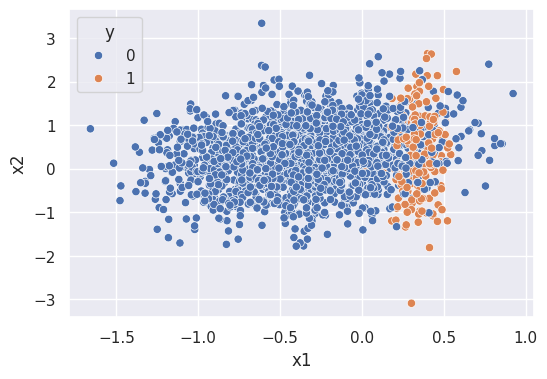

In [1514]:
print('Dimensión de datos generados:')
print('Datos de entrada X:', X.shape)
print('Variable de salida y:', y.shape)

# Los transformamos en un DataFrame de Pandas:
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='x1', y='x2', hue='y');

In [1515]:
X_train, Xvt, y_train, yvt = train_test_split(X, y, train_size=0.60, random_state=1, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)

In [1516]:
# Verificamos el porcentaje de la clase positiva y negativa, generados:
print('Porcentaje de la clase minoritaria: %.2f%%' % (100.*(y_val.sum() / y_val.shape[0])))

Porcentaje de la clase minoritaria: 10.00%


In [1517]:
# Utilizemos el modelo de regresión logística:

modelo = LogisticRegression()

# Entrenamos con los datos de entrenamiento:
modelo.fit(X_train, y_train)

# Veamos el desempeño en cuanto exactitud (accuracy) del modelo con
# los datos de entrenamiento y validación, para verificar si nuestro
# modelo está subentrenado o sobreentrenado:
print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelo.score(X_train,y_train)))
print('Exactitud del modelo con los datos de validación: %.1f%%' % (100*modelo.score(X_val,y_val)))

Exactitud del modelo con los datos de entrenamiento: 90.7%
Exactitud del modelo con los datos de validación: 90.4%


Aunque pareciera que tenemos un buen desempeño y que el modelo no está sobre-entrenado, en realidad el modelo está sub-entrenado. Esto ya que se tiene un porcentaje igual al porcentaje de la clase mayoritaria, que es del 90%.

In [1518]:
# Realizamos las predicciones
y_hat_val = modelo.predict(X_val)

print(confusion_matrix(y_val, y_hat_val))
print(classification_report(y_val, y_hat_val))

[[875  25]
 [ 71  29]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       900
           1       0.54      0.29      0.38       100

    accuracy                           0.90      1000
   macro avg       0.73      0.63      0.66      1000
weighted avg       0.89      0.90      0.89      1000



Aquí observamos cómo los valores de las métricas "precision", "recall" y por lo tanto su promedio armónico "f1-score", son bastante bajos. Lo que nos habla de la poca capacidad de poder predecir correctamente los datos de la clase de interés, la clase positiva.

Veamos si podemos mejorar el modelo con alguna técnica de sub-entrenamiento o sobre-entrenamiento.

Existe una gran variedad de estas técnicas, algunas de las cuales implementaremos de la librería de Imbalanced-learn:

https://imbalanced-learn.org/stable/references/under_sampling.html

https://imbalanced-learn.org/stable/references/over_sampling.html

https://imbalanced-learn.org/stable/references/combine.html

In [1519]:
from imblearn.over_sampling import BorderlineSMOTE

In [1520]:
bsm = BorderlineSMOTE(sampling_strategy=1.,  # porcentaje de nuvoes datos minoritario-vs-mayoritario
                      random_state=11)

# ajustamos y generamos los datos sobre-muestrados (over-sampling)
# con los datos de entrenamiento:
Xtrain_BSM, ytrain_BSM = bsm.fit_resample(X_train, y_train)

# Entrenamos el modelo con los nuevos datos muestrales de entrenamiento:
modeloRL = LogisticRegression(C=10)
modeloRL.fit(Xtrain_BSM, np.ravel(ytrain_BSM))

print('accuracy-train-balanced', modeloRL.score(Xtrain_BSM, ytrain_BSM))
print('accuracy-val-balanced', modeloRL.score(X_val, y_val))

y_pred_train = modeloRL.predict(Xtrain_BSM)

# Observa que en X_val no se aplica el sobremuestreo,
# para evitar el filtrado de información (data-leakage):
y_pred_val = modeloRL.predict(X_val)

print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

accuracy-train-balanced 0.95
accuracy-val-balanced 0.903
[[803  97]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       900
           1       0.51      1.00      0.67       100

    accuracy                           0.90      1000
   macro avg       0.75      0.95      0.81      1000
weighted avg       0.95      0.90      0.92      1000



Observa que ahora tenemos un Recall=1.00 en la clase positiva, sin embargo la precision bajo al 50%. Además de quedar sobre-entrenado.

Habría que buscar un mejor balance ajustando hiperparámetros del modelo o de la técnica de sobre-muestreo, o bien probar algún otro de los modelos de sub-muestreo y/o sobre-muestreo. Ver los difernentes métodos en las ligas dadas arriba.

# Importancia de los Factores

Existen varias técnicas para evaluar la importancia de los factores en relación al involucramiento que tiene cada factor con la variable de salida.

Veamos algunos de ellos.

### Magnitud de los coeficientes.

Este es una técnica muy simple que debe aplicarse cuando los factores han sido todos escalados de manera equivalente. Sin embargo, debe tomarse con mucha cautela esta técnica, ya que no necesariamente la magnitud por sí misma es indicio de mayor involucramiento en la predicción de la variable de salidad. Esto porque pueden existir relaciones entre combinación de factores que disminuya la importancia de dicho factor. En dado caso siempre intenta algunas de las otras técnicas que estaremos viendo más adelante. Pero como una primera aproximación, puede considerarse aceptable.

In [1521]:
# consideremos los coeficientes obtenidos en el último modelo obtenido:
importance = modeloRL.coef_[0]

# Veamos la magnitud de nuestro modelo, que en este caso es solo de de factores (features):
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 12.49683
Feature: 1, Score: -0.26727


Observamos que definitivamente el factor 0 es el de mayor relevancia para predecir la clase.
Geométricamente tiene sentido, porque si observamos la gráfica obtenida al inicio, el factor 0 está asociado al eje horizontal y por lo tanto, y geométricamente observamos que aproximadamente a la izquierda del valor de 0.25 en el eje horizontal se tiene puntos de la clase mayoritaria y a la derecha los de la clase minoritaria.

Observa que el signo positivo de los coeficientes nos habla sobre la influencia de dicho coeficiente sobre la clase positiva (minoritaria en este caso) y los coeficientes negativos nos hablaría sobre el impacto de estos sobre la clase negativa.

Valores cercanos al cero, como en este caso el factor 1, no tendría mucha influencia sobre el comportamiento de la varible de salida.

# Importancia por Permutación

Veamos ahora esta otra técnica más robusta y que aplica también a otros modelos no lineales y no solamente a los modelos de regresión.

Puedes revisar la documentación para mayor información:

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

In [1522]:
from sklearn.inspection import permutation_importance

In [1523]:
# Usemos nuevamente el modelo de regresión logística previamente entrenado:

results = permutation_importance(modeloRL, X_val, y_val, scoring='recall')

importance = results.importances_mean

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.79000
Feature: 1, Score: 0.00000


Además, la ventaja de este método es que nos permite evaluar el impacto de los factores con respecto a diferentes métricas y no solamente el "accuracy" o exactitud. En particular, para el caso de clases no balanceadas, como en este ejercicio, es mejor considerar métricas como el recall, la precision, o su promedio armónico f1, o el ponderado, f1_weighted.

# Selección de Factores mediante el criterio de la Importancia de los mismos.

Puedes consultar su documentación en la siguiente liga:
    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [1524]:
from sklearn.feature_selection import SelectFromModel

In [1525]:
# Con base a los resultados con las técnicas de Importancia de Factores,
# se propone el conjunto de factores que se consideran importantes.
# Para nuestro ejemplo muy sencillo obtuvimos que es solo 2 factor:
max_f = 1

# Indicamos el modelo que se usará para evaluar la importancia de los factores
# y la cantidad de ellos que se desean extraer:
fs = SelectFromModel(estimator=LogisticRegression(), max_features=max_f)
# ajustamos con  los datos de entrenamiento para determinar cuáles se consideran los más relevantes:
fs.fit(X_train, np.ravel(y_train))
# y ahora obtenemos los factores
factor_select = fs.get_support()

print(factor_select)

[ True False]


Obtenemos nuevamente que el primer factor es el más relevante en este caso.

Y seleccionamos entonces solamente los factores o columnas obtenidas en nuestro DataFrame:

In [1526]:
XtrainT_fs = pd.DataFrame(X_train)[pd.DataFrame(X_train).columns[factor_select]]
XvalT_fs = pd.DataFrame(X_val)[pd.DataFrame(X_val).columns[factor_select]]
XtestT_fs = pd.DataFrame(X_test)[pd.DataFrame(X_test).columns[factor_select]]

In [1527]:
XtrainT_fs # y en este caso solo tenemos una columna o factor en nuestro DataFrame.

,0
0,-0.661456
1,-0.131180
2,-0.338835
3,-0.345142
4,-0.254506
...,...
1195,-0.480640
1196,0.048735
1197,-0.017955
1198,-0.326542


In [1528]:
modeloRL = LogisticRegression()
#modeloRL.fit(pd.DataFrame(X_train)[pd.DataFrame(X_train).columns[factor_select]], pd.DataFrame(y_train).values)
modeloRL.fit(XtrainT_fs, np.ravel(pd.DataFrame(y_train)))

# evaluate the model
#ytrainhat = model.predict(Xtrain_fs)
#yvalhat = model.predict(Xval_fs)
#ytesthat = model.predict(Xtest_fs)

# evaluate predictions
R2train = modeloRL.score(XtrainT_fs, np.ravel(y_train))
R2val = modeloRL.score(XvalT_fs, np.ravel(y_val))
R2test = modeloRL.score(XtestT_fs, np.ravel(y_test))

print('R2-Train: %.2f' % (R2train*100))
print('R2-Val: %.2f' % (R2val*100))
print('R2-Test: %.2f' % (R2test*100))

R2-Train: 90.08
R2-Val: 89.80
R2-Test: 89.70


Estos nuevos DataFrame los usaríamos para entrenar un nuevo modelo, con esta reducción de dimensionalidad.

### **>> Fin del ejemplo de esta semana <<**